Here we will analyze a bit the Global Youtube statistics.csv file to understand a bit better the revenues

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# Load the CSV file into a DataFrame
file_path = 'data/Global Youtube Statistics.csv'
youtube_stats_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
youtube_stats_df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [12]:
youtube_stats_df.columns.tolist()

['rank',
 'Youtuber',
 'subscribers',
 'video views',
 'category',
 'Title',
 'uploads',
 'Country',
 'Abbreviation',
 'channel_type',
 'video_views_rank',
 'country_rank',
 'channel_type_rank',
 'video_views_for_the_last_30_days',
 'lowest_monthly_earnings',
 'highest_monthly_earnings',
 'lowest_yearly_earnings',
 'highest_yearly_earnings',
 'subscribers_for_last_30_days',
 'created_year',
 'created_month',
 'created_date',
 'Gross tertiary education enrollment (%)',
 'Population',
 'Unemployment rate',
 'Urban_population',
 'Latitude',
 'Longitude']

In [19]:
columns_with_x = [
    'rank',
    'Youtuber',
    'subscribers',
    'video views',
    'category',
    'lowest_monthly_earnings',
    'highest_monthly_earnings',
    'lowest_yearly_earnings',
    'highest_yearly_earnings',
    'Gross tertiary education enrollment (%)'
]

# Filter the DataFrame to include only the specified columns
filtered_df = youtube_stats_df[columns_with_x]
filtered_df['mean_revenue'] = (filtered_df['lowest_monthly_earnings'] + filtered_df['highest_monthly_earnings']) / 2

# Display the first few rows of the filtered DataFrame
filtered_df.head()

C:\Users\benka\AppData\Local\Temp\ipykernel_9540\2369683229.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['mean_revenue'] = (filtered_df['lowest_monthly_earnings'] + filtered_df['highest_monthly_earnings']) / 2


,rank,Youtuber,subscribers,video views,category,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,Gross tertiary education enrollment (%),mean_revenue
0,1,T-Series,245000000,2.280000e+11,Music,564600.0,9000000.00,6800000.00,1.084000e+08,28.1,4782300.000
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,0.0,0.05,0.04,5.800000e-01,88.2,0.025
2,3,MrBeast,166000000,2.836884e+10,Entertainment,337000.0,5400000.00,4000000.00,6.470000e+07,88.2,2868500.000
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,493800.0,7900000.00,5900000.00,9.480000e+07,88.2,4196900.000
4,5,SET India,159000000,1.480000e+11,Shows,455900.0,7300000.00,5500000.00,8.750000e+07,28.1,3877950.000


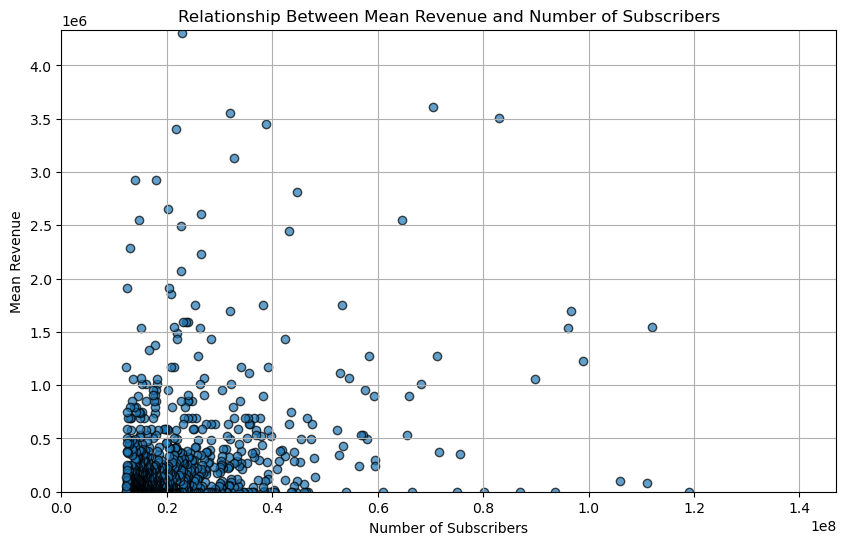

In [18]:
# Create a scatter plot with reduced scales
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['subscribers'], filtered_df['mean_revenue'], alpha=0.7, edgecolors='k')
plt.title('Relationship Between Mean Revenue and Number of Subscribers')
plt.xlabel('Number of Subscribers')
plt.ylabel('Mean Revenue')

# Set limits for x-axis and y-axis to reduce scale
plt.xlim(0, filtered_df['subscribers'].max() * 0.6)  # Adjust x-axis scale (e.g., 60% of max subscribers)
plt.ylim(0, filtered_df['mean_revenue'].max() * 0.6)  # Adjust y-axis scale (e.g., 60% of max revenue)

plt.grid(True)
plt.show()


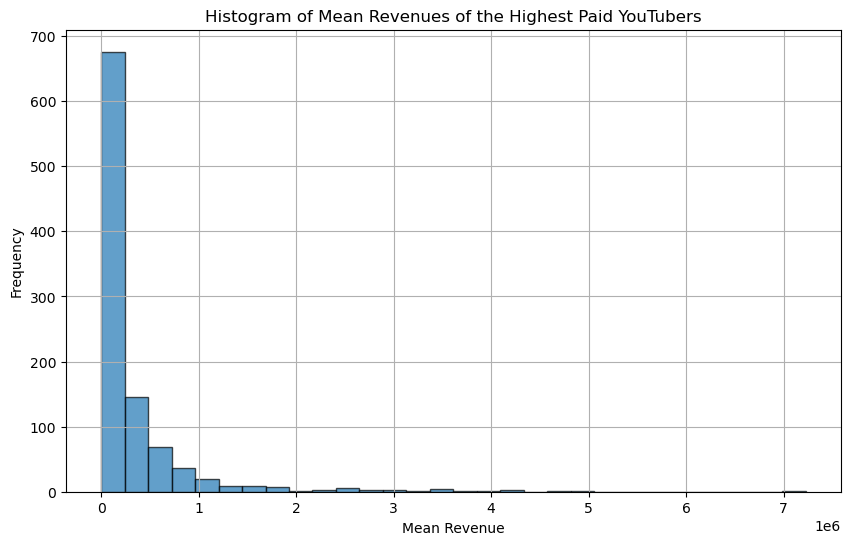

In [20]:
# Plot the mean revenues of the highest paid YouTubers in a histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['mean_revenue'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Mean Revenues of the Highest Paid YouTubers')
plt.xlabel('Mean Revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

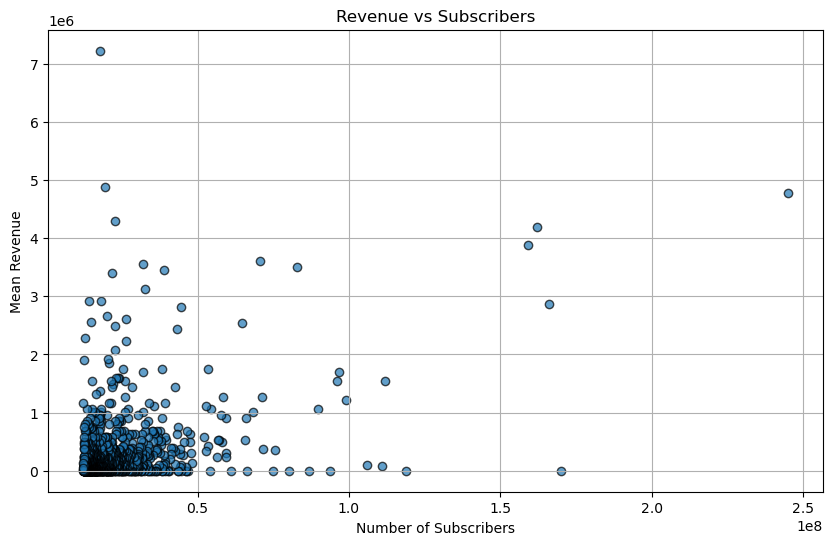

c:\Users\benka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


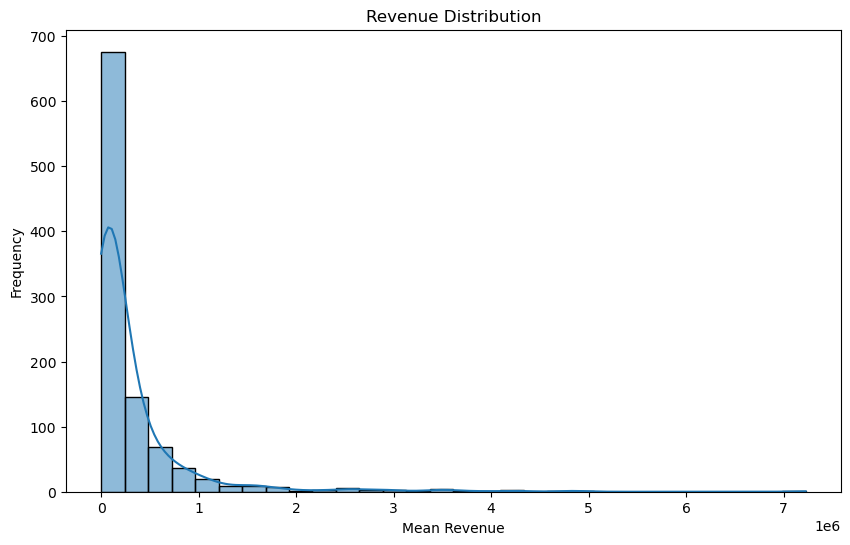

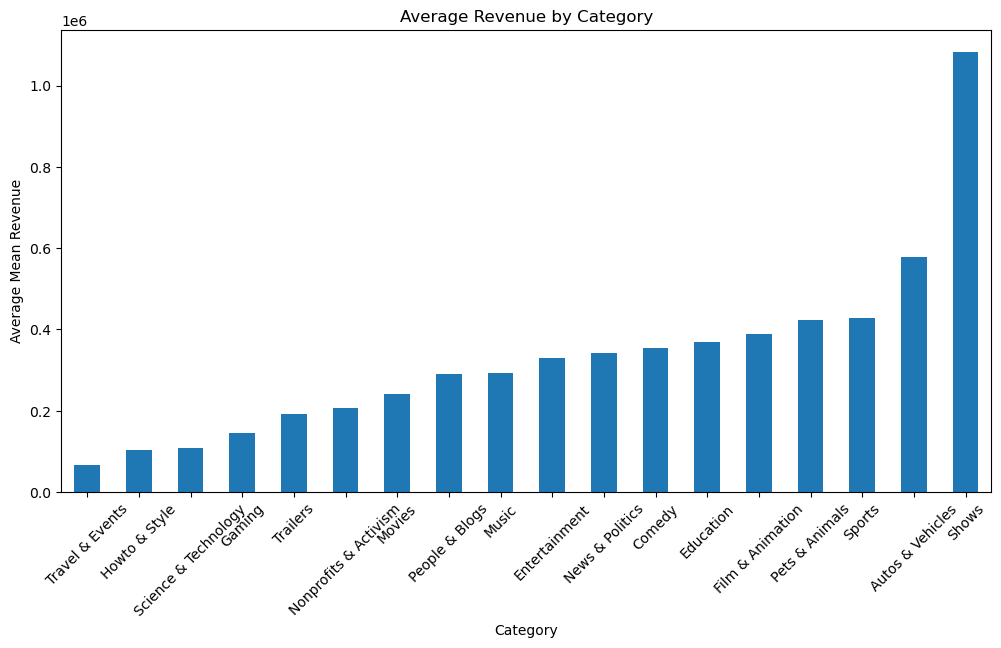

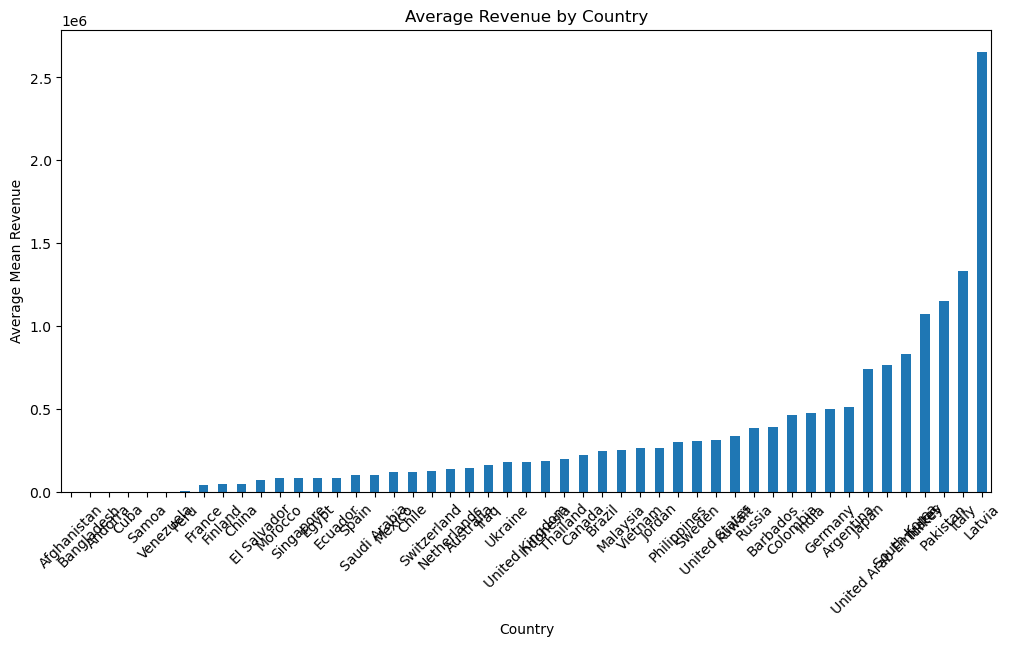

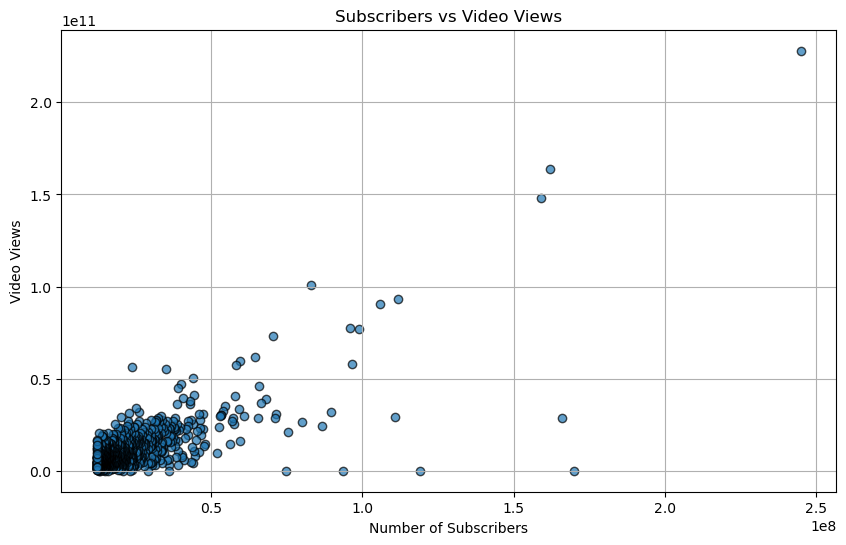

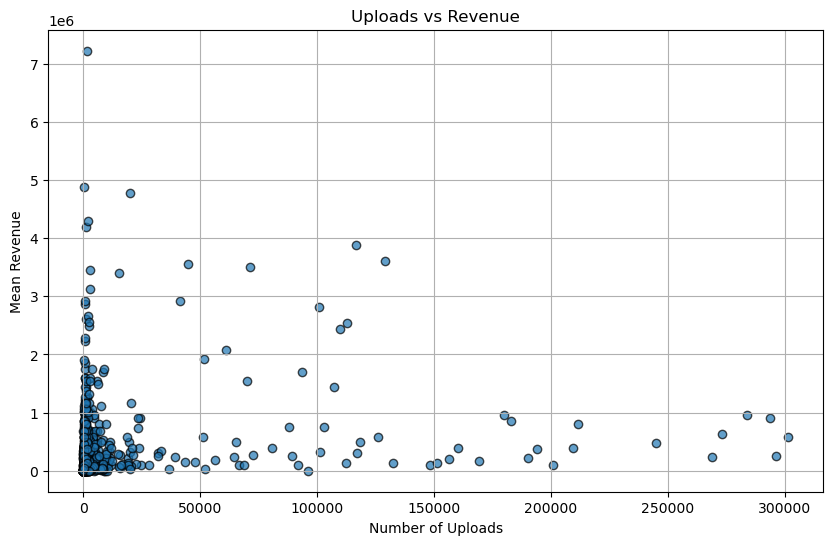

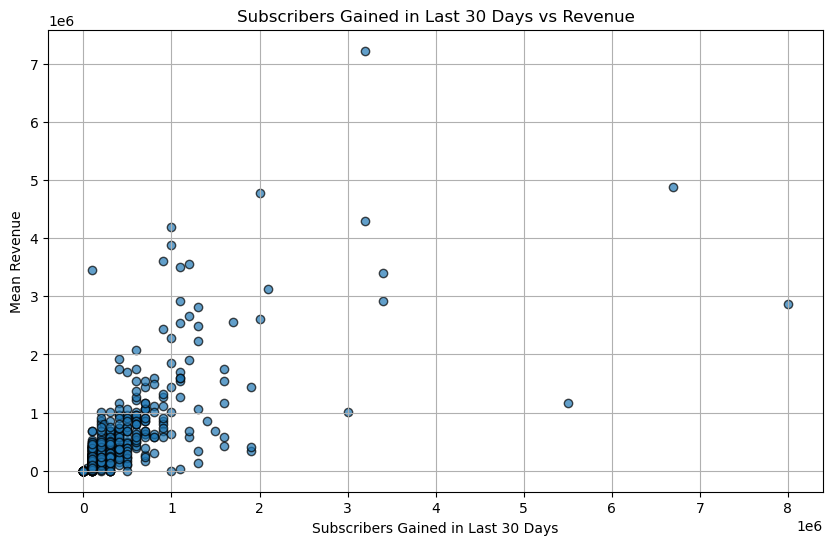

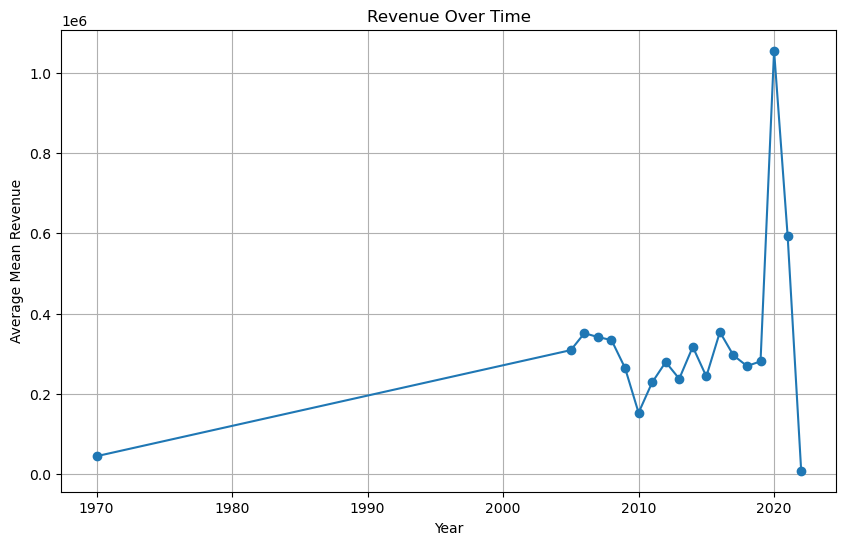

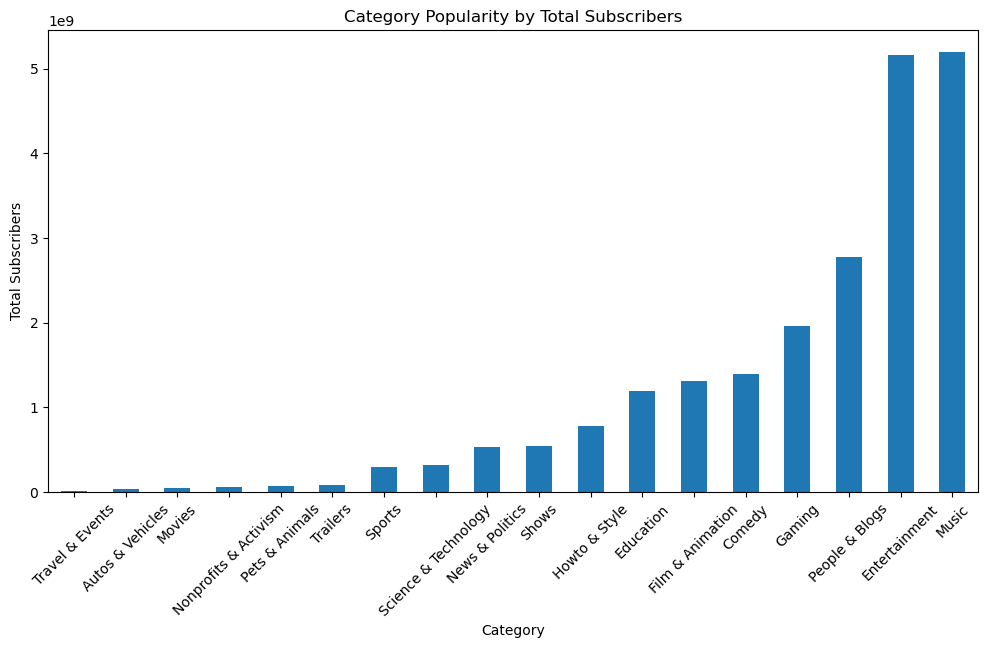

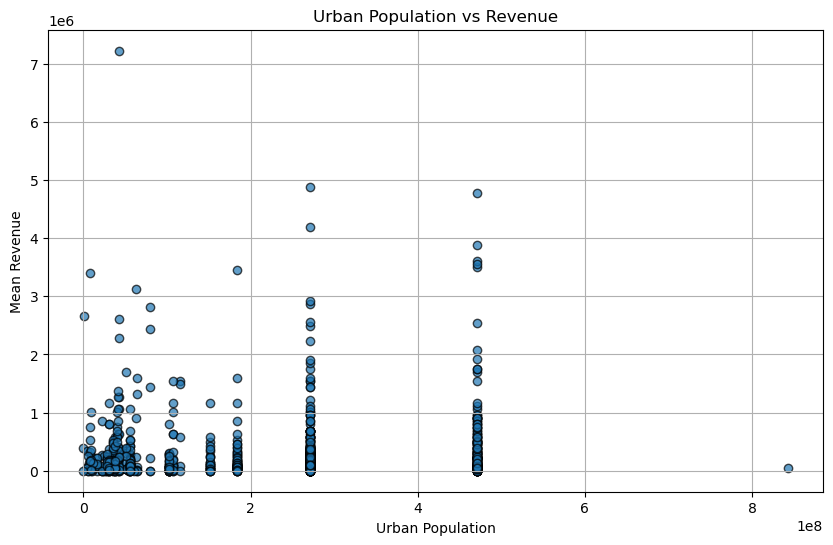

In [21]:

import seaborn as sns

# Calculate mean revenue if columns are available
if 'lowest_monthly_earnings' in youtube_stats_df.columns and 'highest_monthly_earnings' in youtube_stats_df.columns:
    youtube_stats_df['mean_revenue'] = (youtube_stats_df['lowest_monthly_earnings'] + youtube_stats_df['highest_monthly_earnings']) / 2

# 1. Revenue vs Subscribers
plt.figure(figsize=(10, 6))
plt.scatter(youtube_stats_df['subscribers'], youtube_stats_df['mean_revenue'], alpha=0.7, edgecolors='k')
plt.title('Revenue vs Subscribers')
plt.xlabel('Number of Subscribers')
plt.ylabel('Mean Revenue')
plt.grid(True)
plt.show()

# 2. Revenue Distribution
plt.figure(figsize=(10, 6))
sns.histplot(youtube_stats_df['mean_revenue'], bins=30, kde=True)
plt.title('Revenue Distribution')
plt.xlabel('Mean Revenue')
plt.ylabel('Frequency')
plt.show()

# 3. Revenue by Category
plt.figure(figsize=(12, 6))
revenue_by_category = youtube_stats_df.groupby('category')['mean_revenue'].mean().sort_values()
revenue_by_category.plot(kind='bar')
plt.title('Average Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Average Mean Revenue')
plt.xticks(rotation=45)
plt.show()

# 4. Revenue by Country
plt.figure(figsize=(12, 6))
revenue_by_country = youtube_stats_df.groupby('Country')['mean_revenue'].mean().sort_values()
revenue_by_country.plot(kind='bar')
plt.title('Average Revenue by Country')
plt.xlabel('Country')
plt.ylabel('Average Mean Revenue')
plt.xticks(rotation=45)
plt.show()

# 5. Subscribers vs Views
plt.figure(figsize=(10, 6))
plt.scatter(youtube_stats_df['subscribers'], youtube_stats_df['video views'], alpha=0.7, edgecolors='k')
plt.title('Subscribers vs Video Views')
plt.xlabel('Number of Subscribers')
plt.ylabel('Video Views')
plt.grid(True)
plt.show()

# 6. Uploads vs Revenue
plt.figure(figsize=(10, 6))
plt.scatter(youtube_stats_df['uploads'], youtube_stats_df['mean_revenue'], alpha=0.7, edgecolors='k')
plt.title('Uploads vs Revenue')
plt.xlabel('Number of Uploads')
plt.ylabel('Mean Revenue')
plt.grid(True)
plt.show()

# 7. Subscribers Gained in Last 30 Days vs Revenue
plt.figure(figsize=(10, 6))
plt.scatter(youtube_stats_df['subscribers_for_last_30_days'], youtube_stats_df['mean_revenue'], alpha=0.7, edgecolors='k')
plt.title('Subscribers Gained in Last 30 Days vs Revenue')
plt.xlabel('Subscribers Gained in Last 30 Days')
plt.ylabel('Mean Revenue')
plt.grid(True)
plt.show()

# 8. Revenue Over Time
plt.figure(figsize=(10, 6))
revenue_over_time = youtube_stats_df.groupby('created_year')['mean_revenue'].mean()
revenue_over_time.plot(kind='line', marker='o')
plt.title('Revenue Over Time')
plt.xlabel('Year')
plt.ylabel('Average Mean Revenue')
plt.grid(True)
plt.show()

# 9. Category Popularity
plt.figure(figsize=(12, 6))
popularity_by_category = youtube_stats_df.groupby('category')['subscribers'].sum().sort_values()
popularity_by_category.plot(kind='bar')
plt.title('Category Popularity by Total Subscribers')
plt.xlabel('Category')
plt.ylabel('Total Subscribers')
plt.xticks(rotation=45)
plt.show()

# 10. Urbanization vs Revenue
plt.figure(figsize=(10, 6))
plt.scatter(youtube_stats_df['Urban_population'], youtube_stats_df['mean_revenue'], alpha=0.7, edgecolors='k')
plt.title('Urban Population vs Revenue')
plt.xlabel('Urban Population')
plt.ylabel('Mean Revenue')
plt.grid(True)
plt.show()
